In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [505]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [506]:
X_train = df.drop(columns=['Survived', 'Ticket', 'Name'])
y_train = df['Survived']

In [507]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [508]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


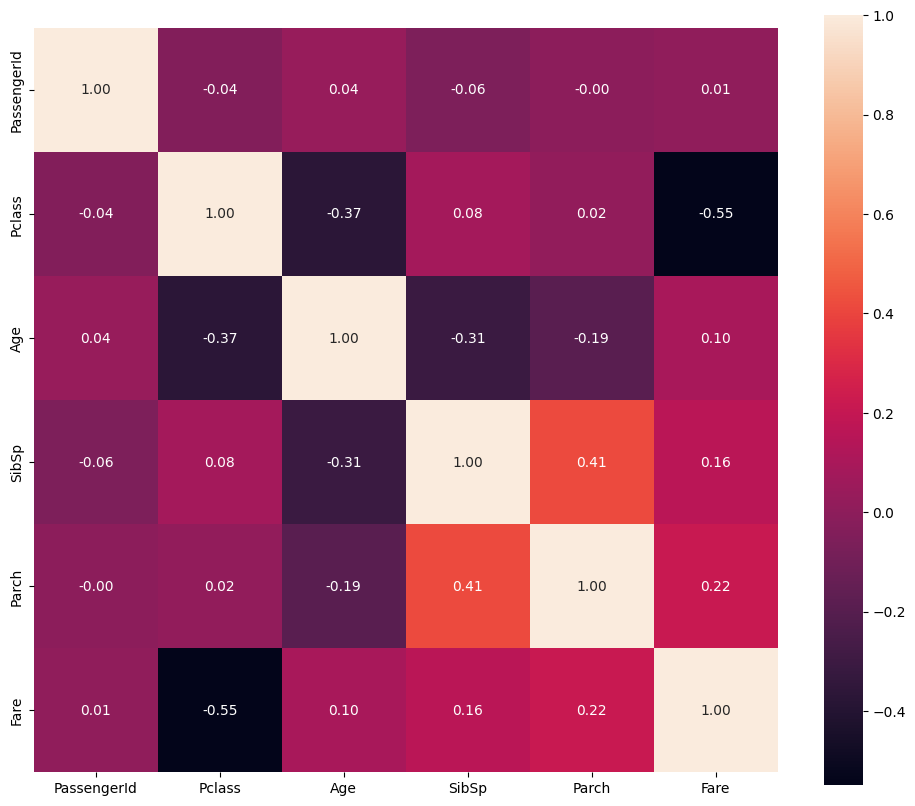

In [509]:
plt.subplots(figsize=(12, 10))
sns.heatmap(X_train.corr(numeric_only = True),fmt='.2f', square = True, annot=True)
plt.show()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

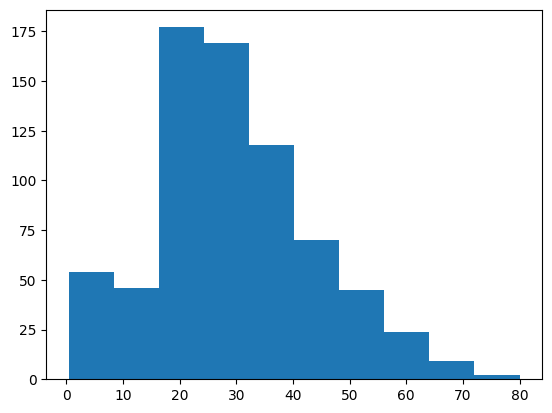

In [456]:
plt.hist(X_train['Age'])

In [510]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace = True)

In [511]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [512]:
X_train['Embarked'].fillna('S', inplace = True)

In [513]:
X_train.drop(columns=['Cabin'], inplace=True)

In [514]:
categorical_features= X_train.select_dtypes(include=object).columns.values
categorical_features

array(['Sex', 'Embarked'], dtype=object)

In [515]:
numeric_features= X_train.select_dtypes(exclude=object).columns.values
numeric_features

array(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype=object)

In [516]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [517]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# конвейер подготовки данных категориального типа
preprocessor = ColumnTransformer(
    [('num', numeric_transformer, numeric_features),
     ('cat',
     OneHotEncoder(handle_unknown='ignore'),
     categorical_features)],
    verbose_feature_names_out = False
)

In [525]:
alg = Pipeline(steps=[('enc', preprocessor), ('alg', RandomForestClassifier(n_estimators=200, n_jobs=2, min_samples_leaf=2, min_samples_split=2))])

In [519]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alg__min_samples_split': [1, 2, 3],
    'alg__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=alg, param_grid=param_grid, cv=5, n_jobs=2)

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.8)

In [521]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('enc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         array(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype=object)),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         array(['Sex', 'Embarked'], dtype=object))],
                                                          verbose_feature_names_out=False)),
                                       ('alg',
                                        RandomForestClassifier(n_estimators=200,
                                                               n_jobs=2))]),
             n_jobs=2,
             param_grid={'alg__min_samples_leaf': [1, 2, 4],
                         'alg__min_samples_split': [1, 2, 3]})

In [526]:
alg.fit(X_train, y_train)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['Sex', 'Embarked'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('alg',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=200,
                                        n_jobs=2))])

In [522]:
grid_search.best_params_

{'alg__min_samples_leaf': 2, 'alg__min_samples_split': 2}

In [527]:
preds = alg.predict(X_test)

In [528]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.814866760168303

In [529]:
X_test = pd.read_csv('test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [400]:
X_test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [401]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [530]:
preds = alg.predict(X_test)

In [531]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [532]:
submission['Survived'] = preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [534]:
submission.to_csv('submission.csv', index=None)